# Impermanent Loss Simulation

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

## Formula

The following formula gives the impermanent loss of coin x relative to coin y.

It is compared to holding coin x and coin y outside the pool.

The prices are quoted in terms of coin y, which is usually a stable coin.

In [2]:
def impermanent_loss(k):
    """
    In a x-y liquidity pool, k is the price factor of coin x relative to y
    i.e. future price of x = x * k
    """
    return (2 * np.sqrt(k)) / (1 + k) - 1


In [3]:
for x in (1, 1.5, 2, 4, 10, 20):
    print((f'When coin x do a {x}x, the impermanent loss '
           f'is about {impermanent_loss(x):.2%}'))


When coin x do a 1x, the impermanent loss is about 0.00%
When coin x do a 1.5x, the impermanent loss is about -2.02%
When coin x do a 2x, the impermanent loss is about -5.72%
When coin x do a 4x, the impermanent loss is about -20.00%
When coin x do a 10x, the impermanent loss is about -42.50%
When coin x do a 20x, the impermanent loss is about -57.41%


In [4]:
for x in (1, 1/1.5, 1/2, 1/4, 1/10, 1/20):
    print((f'When coin x do a {x:4.2f}x, the impermanent loss '
           f'is about {impermanent_loss(x):.2%}'))


When coin x do a 1.00x, the impermanent loss is about 0.00%
When coin x do a 0.67x, the impermanent loss is about -2.02%
When coin x do a 0.50x, the impermanent loss is about -5.72%
When coin x do a 0.25x, the impermanent loss is about -20.00%
When coin x do a 0.10x, the impermanent loss is about -42.50%
When coin x do a 0.05x, the impermanent loss is about -57.41%


The above situation is relative to a base case, where you simply hold coin x and coin y with the same value without join the liquidity pool. In a case coin x do a 10x and coin y is a stable coin, only half of the portfolio is having a 10x gain.

## Portfolio Impact

In [5]:
def portfolio(lp_apy, k, y_chg=.0):
    imp_loss = impermanent_loss(k)
    pf_val1_hodl_in_y = (1+k)/2
    pf_val1_hodl = pf_val1_hodl_in_y * (1 + y_chg)
    pf_val1_lp_in_y = pf_val1_hodl_in_y * (1 + imp_loss) * (1 + lp_apy)
    pf_val1_lp = pf_val1_lp_in_y * (1 + y_chg)

    return {
        'pf_val1_hodl': pf_val1_hodl,
        'pf_val1_lp': pf_val1_lp,
        'pf_val1_in_y': pf_val1_lp_in_y,
        'imp_loss': imp_loss,
    }


In [6]:
portfolio(0.6, 10, 0.0)

{'pf_val1_hodl': 5.5,
 'pf_val1_lp': 5.059644256269408,
 'pf_val1_in_y': 5.059644256269408,
 'imp_loss': -0.42504042542393095}

In [7]:
for apy in (0, .1, .2, .5, .8, 1.5, 3.0):
    for k in (1, 2, 5, 10):
        hodl, pf_val1, _, il = portfolio(apy, k, 0).values()
        print((f'If coin x {k:4.1f}x relative to coin y, '
               f'hodl return is {hodl-1:4.0%}, '
               f'LP return is {pf_val1-1:4.0%} given {apy:4.0%} reward apy.'))

If coin x  1.0x relative to coin y, hodl return is   0%, LP return is   0% given   0% reward apy.
If coin x  2.0x relative to coin y, hodl return is  50%, LP return is  41% given   0% reward apy.
If coin x  5.0x relative to coin y, hodl return is 200%, LP return is 124% given   0% reward apy.
If coin x 10.0x relative to coin y, hodl return is 450%, LP return is 216% given   0% reward apy.
If coin x  1.0x relative to coin y, hodl return is   0%, LP return is  10% given  10% reward apy.
If coin x  2.0x relative to coin y, hodl return is  50%, LP return is  56% given  10% reward apy.
If coin x  5.0x relative to coin y, hodl return is 200%, LP return is 146% given  10% reward apy.
If coin x 10.0x relative to coin y, hodl return is 450%, LP return is 248% given  10% reward apy.
If coin x  1.0x relative to coin y, hodl return is   0%, LP return is  20% given  20% reward apy.
If coin x  2.0x relative to coin y, hodl return is  50%, LP return is  70% given  20% reward apy.
If coin x  5.0x rela

## Plotting

In [8]:
apy, k = np.meshgrid(
    np.linspace(0, +3 , 30),
    np.linspace(0, +10, 30)
)


In [9]:
hodl_return = lambda *args, **kwargs: portfolio(*args, **kwargs)['pf_val1_hodl']
lp_return = lambda *args, **kwargs: portfolio(*args, **kwargs)['pf_val1_lp']
net_return = lambda *args, **kwargs: lp_return(*args, **kwargs) - hodl_return(*args, **kwargs)

In [10]:
Z_lp_return = lp_return(apy, k)
Z_hodl_return = hodl_return(apy, k)
Z_net_return = net_return(apy, k)


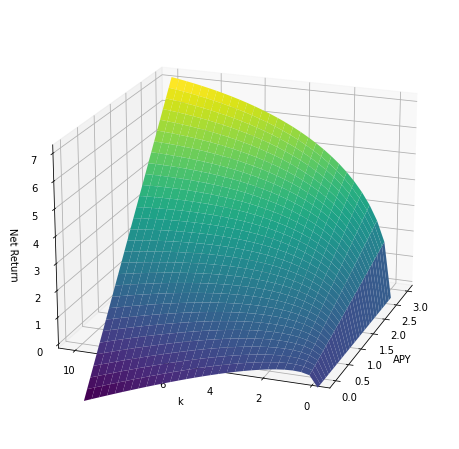

In [11]:
#%matplotlib widget
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
#ax.plot_wireframe(apy, k, Z_hodl_return, color='black')
#ax.plot_surface(apy, k, Z_lp_return, cmap='viridis')
ax.plot_surface(apy, k, Z_net_return, cmap='viridis')
ax.set_xlabel('APY')
ax.set_ylabel('k')
ax.set_zlabel('Net Return')
ax.set_zlim3d(0)
ax.view_init(20, 200)

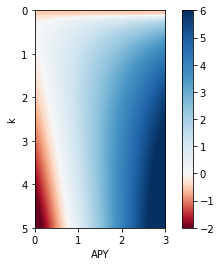

In [12]:
fig, ax = plt.subplots()
im = ax.imshow(Z_net_return, 
               extent=(0, 3, 5, 0), 
               cmap=plt.cm.RdBu, 
               norm=colors.TwoSlopeNorm(0, -2, +6), 
               interpolation='bilinear')
ax.set_xlabel('APY')
ax.set_ylabel('k')
plt.colorbar(im)


## Log Plot

In [13]:
def portfolio(lp_apy, k, y_chg=.0):
    lp_apy, k, y_chg = np.exp(lp_apy), np.exp(k), np.exp(y_chg)
    imp_loss = impermanent_loss(k)
    pf_val1_hodl_in_y = (1+k)/2
    pf_val1_hodl = pf_val1_hodl_in_y * (1 + y_chg)
    pf_val1_lp_in_y = pf_val1_hodl_in_y * (1 + imp_loss) * (1 + lp_apy)
    pf_val1_lp = pf_val1_lp_in_y * (1 + y_chg)

    return {
        'pf_val1_hodl': np.log(pf_val1_hodl),
        'pf_val1_lp': np.log(pf_val1_lp),
        'pf_val1_in_y': np.log(pf_val1_lp_in_y),
        'imp_loss': np.log(1+imp_loss),
    }



In [14]:
apy, k = np.meshgrid(
    np.linspace(-1.1, +1.1, 30),
    np.linspace(-2.3, +2.3, 30)
)

In [15]:
hodl_return = lambda *args, **kwargs: portfolio(*args, **kwargs)['pf_val1_hodl']
lp_return = lambda *args, **kwargs: portfolio(*args, **kwargs)['pf_val1_lp']
net_return = lambda *args, **kwargs: lp_return(*args, **kwargs) - hodl_return(*args, **kwargs)


In [16]:
Z_lp_return = lp_return(apy, k)
Z_hodl_return = hodl_return(apy, k)
Z_net_return = net_return(apy, k)


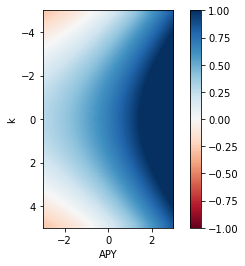

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(Z_net_return, 
               extent=(-3, +3, +5, -5), 
               cmap=plt.cm.RdBu, 
               norm=colors.TwoSlopeNorm(0, -1, +1), 
               interpolation='bilinear')
ax.set_xlabel('APY')
ax.set_ylabel('k')
plt.colorbar(im)
